In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
x = np.array([0, 1.3, 2.1, 2.8, 4.2, 5.7])
y = np.array([-1, -1, -1, 1, -1, 1 ])

In [84]:
def predict(x, t):
    z = x-t
    return 1 if z > 0 else (-1 if z < 0 else float('NaN')) # 1 if z>0, -1 if z<0, break if z==0
    return res

In [85]:
def hindgeLoss(x, y, t):
    z = x-t
    epsilon = np.maximum(0, 1 - y*z)
    return np.sum(epsilon)

### Part 2 (a)

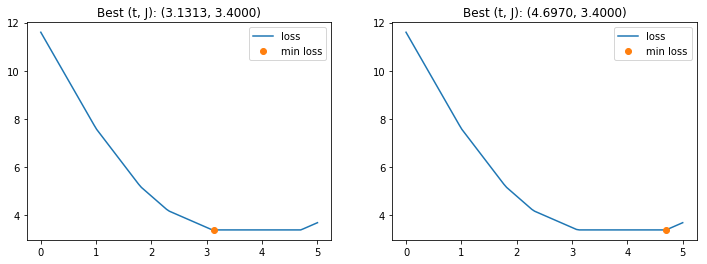

In [86]:
plt.figure(figsize=(12,4))
for i, cmp in enumerate([lambda a, b: a<b, lambda a, b: a<=b]):
    plt.subplot(1,2,i+1)
    hist = {}
    minLoss = float('Inf')
    t_best = -1
    hist['t'] = []
    hist['J'] = []
    
    for t in np.linspace(0, 5, 100):
        J = hindgeLoss(x, y, t)

        if cmp(J, minLoss):
            minLoss = J
            t_best = t

        hist['t'].append(t)
        hist['J'].append(J)

    plt.title("Best (t, J): ({:.4f}, {:.4f})".format(t_best, minLoss))
    plt.plot(hist['t'], hist['J'], label="loss")
    plt.plot(t_best, minLoss, 'o', label="min loss")
    plt.legend()

### Part 2 (c)

In [111]:
t = 4.5
z = x-t
epsilon = np.maximum(0, 1 - y*z)

print(epsilon)

[ 0.   0.   0.   2.7  0.7  0. ]


### Part 2 (d)

In [112]:
def predict(x, t):
    z = x-t
    res = np.zeros_like(z)
    res[np.greater(z, 0)] = 1
    res[np.less(z, 0)] = -1
    res[np.equal(z, 0)] = float('NaN')
    return res

 x	y	y_hat	correct	slack
 0.0	-1	-1.0	True	0.0
 1.3	-1	-1.0	True	0.0
 2.1	-1	-1.0	True	0.0
 2.8	1	-1.0	False	2.7
 4.2	-1	-1.0	True	0.7000000000000002
 5.7	1	1.0	True	0.0



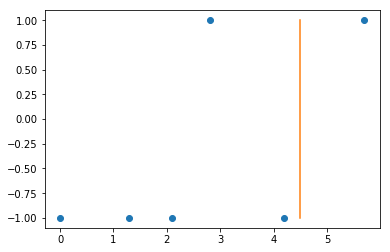

In [120]:
plt.plot(x, y, 'o')
plt.plot([t,t], [-1, 1])

print(" x\ty\ty_hat\tcorrect\tslack")
print("", *["{}\t{}\t{}\t{}\t{}\n".format(*u) for u in zip(x, y, predict(x, t), predict(x, t)==y, epsilon)] )  

In [122]:
print(" x & y & y_hat & correct & slack \\hline")
print("", *["{} & {} & {} & {} & {} \\\\\n".format(*u) for u in zip(x, y, predict(x, t), predict(x, t)==y, epsilon)] )  

 x & y & y_hat & correct & slack \hline
 0.0 & -1 & -1.0 & True & 0.0 \\
 1.3 & -1 & -1.0 & True & 0.0 \\
 2.1 & -1 & -1.0 & True & 0.0 \\
 2.8 & 1 & -1.0 & False & 2.7 \\
 4.2 & -1 & -1.0 & True & 0.7000000000000002 \\
 5.7 & 1 & 1.0 & True & 0.0 \\



### Part 3 (a)

In [158]:
X = [
 [0, 0, 0,  0],
 [0, 0, 1,  0],
 [0, 0, 1,  0],
 [0, 0, 1,  0]
]

W = [
 [0, 0, 0,  0],
 [0, 1, 1,  0],
 [0, 1, 1,  0],
 [0, 0, 0,  0]
]

X, W = np.array(X), np.array(W)


def vec(A):
    B = []
    [B.extend(A[:, i]) for i in range(A.shape[1])]
    return np.array(B)

x = vec(X)
w = vec(W)

print("X =",x)
print("W =",w)
print("x \\dot w =", np.dot(x, w))

X = [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
W = [0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0]
x \dot w = 2


### Part 3 (e)

In [159]:
print(x.reshape(4,4, order='F'))

[[0 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]]


### Part 4 (a)

In [275]:
# data
x = np.array([0, 1, 2, 3])
y = np.array([1, -1, 1, -1])

# params
alpha = np.array([0, 0, 1, 1]) # dual vector
gamma = 3                      # param for rbf

def rbf(a, b):
    return np.exp(-gamma * (a-b)**2)

def predict(x, alpha, gamma, K):
    # data
    data_x = np.array([0, 1, 2, 3])
    data_y = np.array([1, -1, 1, -1])

    # score
    z = np.matmul(K(x, data_x), alpha*data_y)
    
    # prediction
    y_hat = np.zeros_like(z)
    y_hat[np.greater(z, 0)] = 1
    y_hat[np.less(z, 0)] = -1
    
    return y_hat



	75.0% accuracy



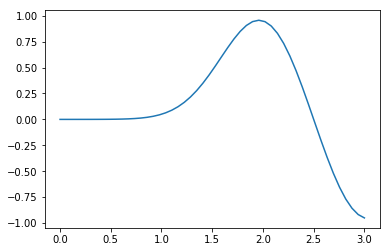

In [276]:
# data
data_x = np.array([0, 1, 2, 3])
data_y = np.array([1, -1, 1, -1])

# params
alpha = np.array([0, 0, 1, 1]) # dual vector
gamma = 3                      # param for rbf

# kernal function 
def K(a, b):
    return np.exp(-gamma * (a-b)**2)

# points to classify
x = np.linspace(0,3)[:, None]

# interior score
z = np.matmul(K(x, data_x), alpha*data_y)

# prediction
y_hat = predict(data_x[:,None], alpha, gamma, K)

# accuracy
acc_a = np.mean(np.equal(y_hat, data_y))
print("\n\t{}% accuracy\n".format(100*acc_a))

# plot
plt.plot(x, z)

### Part 4 (b)


	50.0% accuracy



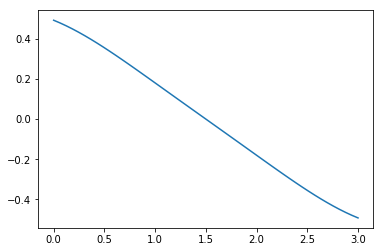

In [277]:
# data
data_x = np.array([0, 1, 2, 3])
data_y = np.array([1, -1, 1, -1])

# params
alpha = np.array([1, 1, 1, 1]) # dual vector
gamma = 0.3                      # param for rbf

# kernal function 
def K(a, b):
    return np.exp(-gamma * (a-b)**2)

# points to classify
x = np.linspace(0,3)[:, None]

# interior score
z = np.matmul(K(x, data_x), alpha*data_y)

# prediction
y_hat = predict(data_x[:,None], alpha, gamma, K)

# accuracy
acc_b = np.mean(np.equal(y_hat, data_y))
print("\n\t{}% accuracy\n".format(100*acc_b))

# plot
plt.plot(x, z)

### Part 4 (c)

In [281]:
print("\n\ta) {}% accuracy".format(100*acc_a))
print("\tb) {}% accuracy\n".format(100*acc_b))
print("\tThe settings in part (a) yield higher accuracy")


	a) 75.0% accuracy
	b) 50.0% accuracy

	The settings in part (a) yield higher accuracy
